<a href="https://colab.research.google.com/github/jahnavi443/Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape()

TypeError: ignored

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1:positive correlation
2:negative correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-10-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


In [ ]:
#constructing heatmap to understand the correlation

<Axes: >

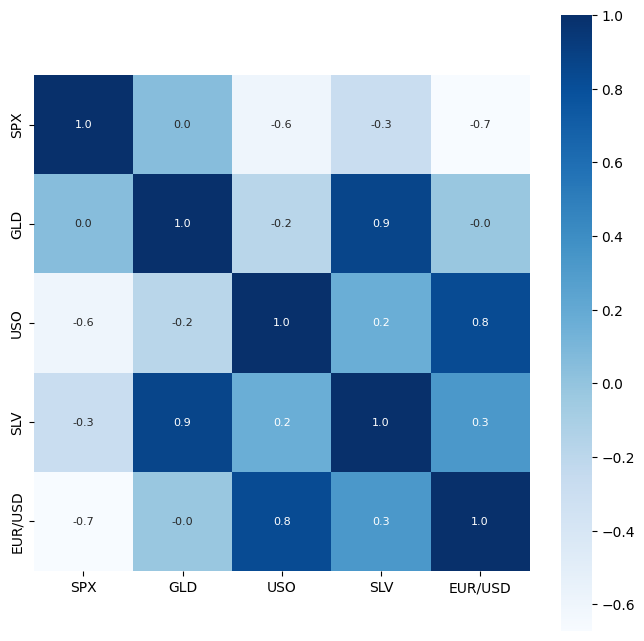

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True , square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-3a1996260e0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

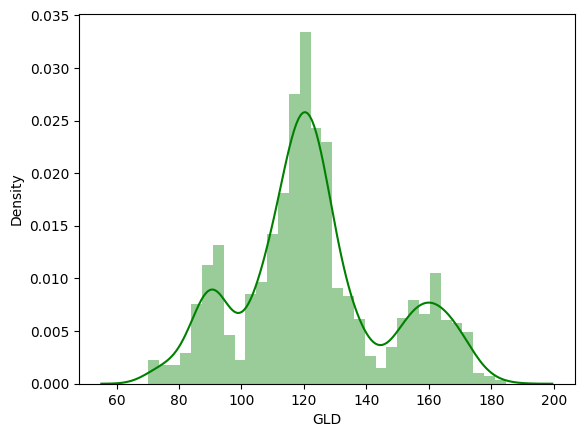

In [ ]:
#checking the distribution of the gld price
sns.distplot(gold_data['GLD'],color='green')

splitting the features and Target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data

In [ ]:
x_train , x_test ,y_train ,y_test=train_test_split(x,y,test_size =0.2,random_state=2)

Model Training:Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#tarining the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on Test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.47349946  81.61970007 116.28219996 127.61150088 120.77700174
 154.72049759 150.4275988  126.12970055 117.376399   125.9998008
 116.67250121 172.65520111 141.56999901 168.03779816 115.17459985
 117.57700019 139.76370286 170.33450138 159.02750352 158.6708997
 155.17969992 124.94460032 175.48639962 157.02490389 125.16560042
  93.74059973  77.71110008 120.9563003  119.12349938 167.43869933
  88.26200038 125.27999987  91.12230064 117.75890008 121.0303994
 136.77080115 115.58090167 115.18250052 148.61919966 106.93790103
 104.63080259  87.09949808 126.43980055 117.83269996 152.28509905
 119.75660029 108.31770011 108.23399839  93.15720028 127.34559713
  75.06150024 113.55629925 121.33989998 111.24789912 118.95699901
 120.72219968 158.49870018 167.5237013  146.90999616  85.78349859
  94.44490056  86.76679886  90.5834003  119.04790057 126.39020067
 127.52700015 169.91280022 122.29389959 117.15349935  98.53239998
 168.21500094 143.02449807 131.92800203 121.2778021  120.92969914
 119.61010075

In [ ]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)

In [ ]:
print("R squared error score:",error_score)

R squared error score: 0.988529199641071


Compare the actual values and predicted values in a plot

In [ ]:
y_test=list(y_test)

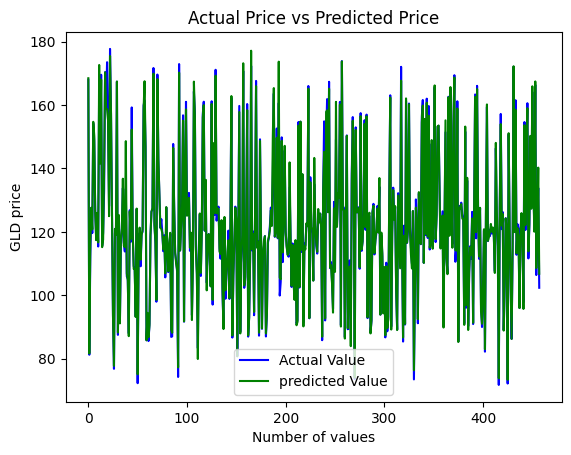

In [ ]:
plt.plot(y_test ,color='Blue',label="Actual Value")
plt.plot(test_data_prediction,color='green',label='predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()